<a href="https://colab.research.google.com/github/iudeen/Flood-Prediction/blob/master/Flood%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
#import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
#from sklearn import svm
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
from flask import Flask



Upload Rainfall Data 

In [38]:
df_rain = pd.read_csv("Hoppers Crossing-Hourly-Rainfall.csv")

In [39]:
df_rain.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm)
0,2018-12-02 18:00:00,0.0,0.0
1,2018-12-02 17:00:00,0.0,0.0
2,2018-12-02 16:00:00,0.0,0.0
3,2018-12-02 15:00:00,0.0,0.0
4,2018-12-02 14:00:00,0.0,0.0


In [40]:
df_rain.shape

(78848, 3)

In [41]:
df_rain.describe()  


,Current rainfall (mm),Cumulative rainfall (mm)
count,78844.000000,78847.000000
mean,0.049206,0.586580
std,0.765296,2.770216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


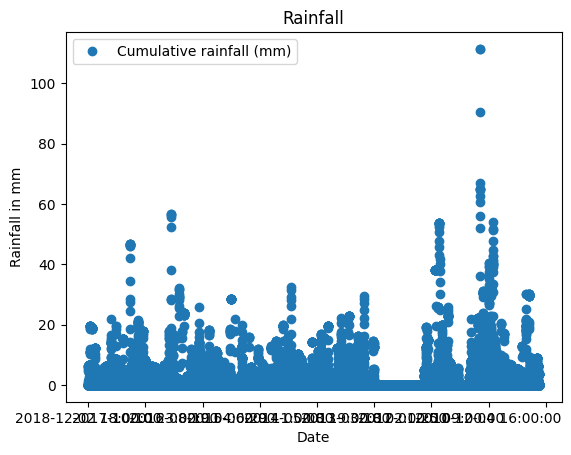

In [42]:
df_rain.plot(x='Date/Time', y='Cumulative rainfall (mm)', style='o')  

plt.title('Rainfall')  
plt.xlabel('Date')  
plt.ylabel('Rainfall in mm')  
plt.show()  

Upload River Data

In [43]:
df_river = pd.read_csv("Hoppers Crossing-Hourly-River-Level.csv")

In [44]:
df_river.head()

,Date/Time,Level (m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63


In [45]:
df_river.shape

(78822, 2)

In [46]:
df_river.describe()  

,Level (m)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


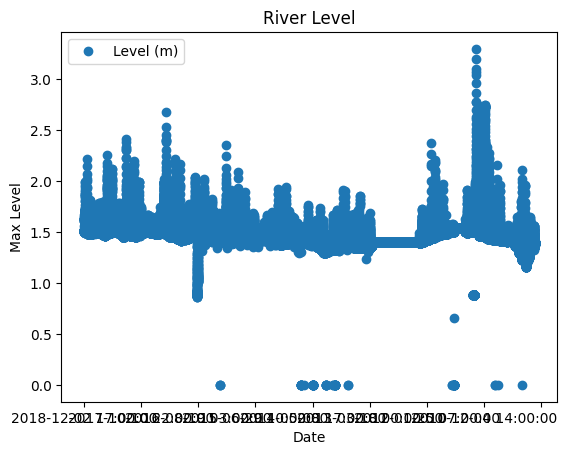

In [47]:
df_river.plot(x='Date/Time', y='Level (m)', style='o')  
plt.title('River Level')  
plt.xlabel('Date')  
plt.ylabel('Max Level')  
plt.show()  

In [48]:
#df_river["Date/Time"] = df_river["Date/Time"].str.replace("00:00", "")
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2009-12-01 00:00:00,0.0,0.2,NaN
1,2009-12-01 01:00:00,0.0,0.2,NaN
2,2009-12-01 02:00:00,0.0,0.2,NaN
3,2009-12-01 03:00:00,0.0,0.2,NaN
4,2009-12-01 04:00:00,0.0,0.2,NaN


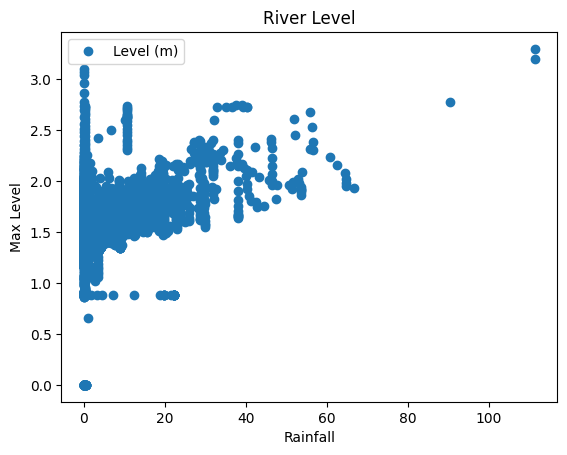

In [49]:
df.plot(x='Cumulative rainfall (mm)', y='Level (m)', style='o')  
plt.title('River Level')  
plt.xlabel('Rainfall')  
plt.ylabel('Max Level')  
plt.show()  

In [50]:
df['Cumulative rainfall (mm)'] = df['Cumulative rainfall (mm)'].fillna(0)
df['Level (m)'] = df['Level (m)'].fillna(0)

df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2009-12-01 00:00:00,0.0,0.2,0.0
1,2009-12-01 01:00:00,0.0,0.2,0.0
2,2009-12-01 02:00:00,0.0,0.2,0.0
3,2009-12-01 03:00:00,0.0,0.2,0.0
4,2009-12-01 04:00:00,0.0,0.2,0.0


In [51]:
#df = df[(df != 0).all(1)]

In [52]:
df = df.drop(columns=['Current rainfall (mm)', 'Date/Time'])
df.shape

(78850, 2)

In [53]:

X = df.iloc[:, :1].values
y = df.iloc[:, 1:2].values

In [54]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
#print(X)
#print(y)

In [56]:
#from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


In [57]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
print(regressor.intercept_)

[1.44355046]


In [59]:
print(regressor.coef_)  

[[0.01688407]]


In [60]:
y_pred = regressor.predict(X_test) 

In [61]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate percentage accuracy
percentage_accuracy = 100 - mae / y_test.mean() * 100

print("Mean Absolute Error (MAE):", mae)
print("Percentage Accuracy:", percentage_accuracy, "%")


Mean Absolute Error (MAE): 0.06314741883023064
Percentage Accuracy: 95.65272997991133 %


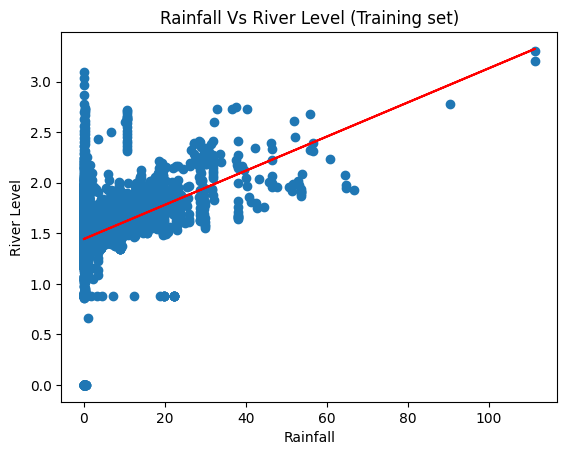

In [62]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

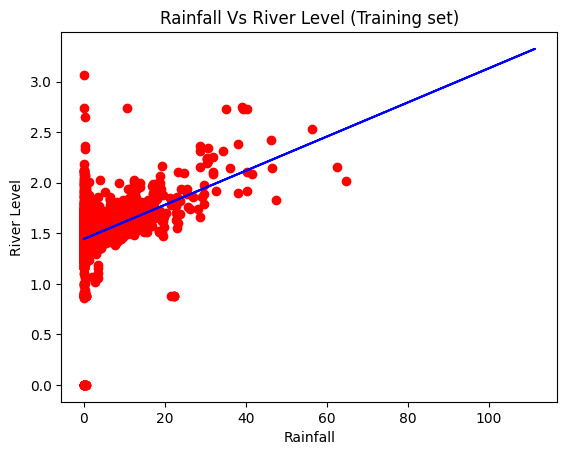

In [63]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

In [64]:
# Prompt the user to input the rainfall amount
Rainfall_Amount = float(input("Enter the rainfall amount: "))



In [65]:
#@title Flood possibility
#predicted_riverlevel = regressor.predict(Rainfall_Amount)
#print(predicted_riverlevel)
#if (predicted_riverlevel > 1.5):
  #print("FLOOD")
#else:
  #print("No FLOOD")

In [66]:


# Define thresholds for flood risk levels
LOW_RISK_THRESHOLD = 1.5
MEDIUM_RISK_THRESHOLD = 2.5
HIGH_RISK_THRESHOLD = 3.0



# Function to provide mitigation strategies based on the predicted river level
def provide_mitigation_strategies(predicted_riverlevel):
    if predicted_riverlevel <= LOW_RISK_THRESHOLD:
        print("LOW RISK: No immediate action required.")
    elif LOW_RISK_THRESHOLD < predicted_riverlevel <= MEDIUM_RISK_THRESHOLD:
        print("MEDIUM RISK: Implement mitigation strategies such as strengthening riverbanks and clearing drainage systems.")
    elif MEDIUM_RISK_THRESHOLD < predicted_riverlevel <= HIGH_RISK_THRESHOLD:
        print("HIGH RISK: Implement mitigation strategies such as evacuation planning and reinforcing flood defenses.")
    else:
        print("CRITICAL RISK: Implement emergency response measures and shelter preparation.")


In [67]:
def predict_flood_probability_from_rainfall_amount(rainfall_amount):
    
    predicted_riverlevel = regressor.predict(rainfall_amount)
    return predicted_riverlevel
#Reshaping the Rainfall_Amount variable to a 2D array
Rainfall_Amount = np.array(Rainfall_Amount).reshape(-1, 1)


predicted_riverlevel = regressor.predict(Rainfall_Amount)


if predicted_riverlevel > 2.5:
    print("FLOODS.")
else:
    print("NO FLOODS:No immediate action required.")
def main():
    # Example rainfall amount (replace with actual input)
    
    # Predict river level based on rainfall amount
    predicted_riverlevel = predict_flood_probability_from_rainfall_amount(Rainfall_Amount)
    print("Predicted River Level:", predicted_riverlevel)
    
    # Provide mitigation strategies based on predicted river level
    provide_mitigation_strategies(predicted_riverlevel)

# Execute main function
if __name__ == "__main__":
    main()

FLOODS.
Predicted River Level: [[3.13195755]]
CRITICAL RISK: Implement emergency response measures, shelter preparation.


In [71]:
import joblib
# Train your model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

joblib.dump(regressor, 'model_file.pkl')

['model_file.pkl']

In [69]:
pickle.dump(regressor, open('model.pkl','wb'))

In [70]:
model = pickle.load(open('model.pkl','rb'))